## Install Python packages

In [2]:
!pip install numpy matplotlib

In [3]:
import matplotlib.pyplot as plt
import xarray as xr

## SPEI and SPI drought indices

### SPEI 

The Standardized Precipitation Evapotranspiration Index (SPEI, Vicente-Serrano et al., 2010) is a commonly used meteorological drought index. The SPEI measures the water deficit at the land surface that accumulated over a certain time windows, usually months, and evaluates the deficit with respect to a reference period. SPEI values are in units of standard deviation from the standardised mean, i.e., negative values indicate drier-than-usual periods while positive values correspond to wetter-than-usual periods. The magnitude of the SPEI is an indicator of the severity of event. The following range of values is typically used to identify the severity of the event:

SPEI > 2.0: extremely wet
1.5 < SPEI <= 2.0: severely wet
1.0 < SPEI <= 1.5: moderately wet
0 < SPEI <= 1.0: near-normal / mildly wet
–1.0 < SPEI <= 0: near-normal / mildly dry
–1.5 < SPEI <= –1.0: moderately dry
–2.0 < SPEI <= –1.5: severely dry
SPEI < –2.0: extremely dry

Values of the SPEI between -1 and 1 are also often considered near-normal.

The SPEI is typically computed over a range of time windows from 1 over 3 and 6 to 12 months or more. The time window considered is indicative of the potential impact of meteorological drought, which is often the primary driver of drought.

### SPI

The Standardized Precipitation Index, or SPI, is a drought index that captures how observed precipitation deviates from the climatological average over a given time period. This global SPI is derived from the ECMWF ERA5 dataset, using the Climate Engine tool, and includes timescales of 1, 2, 3, 6, 9 and 12 months.

## Load netCDF file 

In [5]:
file_path = '../data/SPEI1_genlogistic_global_era5t_moda_ref1991to2020_202401.nc'
ds = xr.open_dataset(file_path)
ds

<xarray.Dataset> Size: 8MB
Dimensions:  (time: 1, lat: 721, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 8B 2024-01-01T06:00:00
  * lat      (lat) float64 6kB 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lon      (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
Data variables:
    SPEI1    (time, lat, lon) float64 8MB ...
Attributes:
    title:        SPEI1
    description:  Drought Index: Standardized Drought Index calculated accord...
    history:      Created 01/03/2024 13:00:32 using DRYFALL.
    institution:  ECMWF
    source:       DRYFALL v0.1

In [6]:
print(ds.variables)

Frozen({'time': <xarray.IndexVariable 'time' (time: 1)> Size: 8B
array(['2024-01-01T06:00:00.000000000'], dtype='datetime64[ns]'), 'lat': <xarray.IndexVariable 'lat' (lat: 721)> Size: 6kB
array([ 90.  ,  89.75,  89.5 , ..., -89.5 , -89.75, -90.  ])
Attributes:
    units:    degrees_north, 'lon': <xarray.IndexVariable 'lon' (lon: 1440)> Size: 12kB
array([-180.  , -179.75, -179.5 , ...,  179.25,  179.5 ,  179.75])
Attributes:
    units:    degrees_east, 'SPEI1': <xarray.Variable (time: 1, lat: 721, lon: 1440)> Size: 8MB
[1038240 values with dtype=float64]
Attributes:
    units:      -
    long_name:  Standardized Drought Index (SPEI1)})


In [7]:
spei1 = ds['SPEI1']
spei1

<xarray.DataArray 'SPEI1' (time: 1, lat: 721, lon: 1440)> Size: 8MB
[1038240 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 8B 2024-01-01T06:00:00
  * lat      (lat) float64 6kB 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lon      (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
Attributes:
    units:      -
    long_name:  Standardized Drought Index (SPEI1)

In [8]:
print(spei1.attrs)

{'units': '-', 'long_name': 'Standardized Drought Index (SPEI1)'}


## Visualize

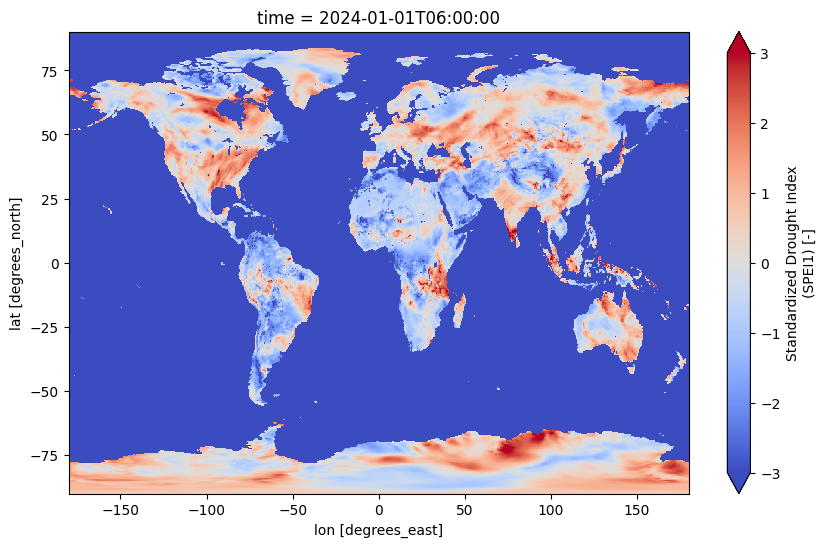

In [9]:
spei1.isel(time=0).plot(cmap='coolwarm', figsize=(10, 6), vmin=-3, vmax=3)

## Select an AoI

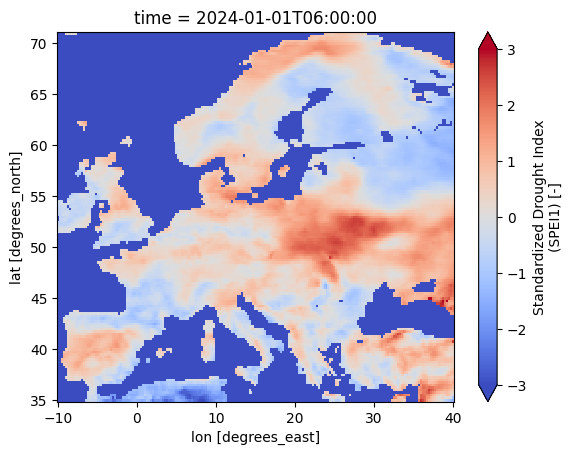

In [10]:
# latitude and longitude ranges for Europe
lat_min = 35
lat_max = 71
lon_min = -10
lon_max = 40

spei1_greece = spei1.where((spei1.lat >= lat_min) & (spei1.lat <= lat_max) & 
                           (spei1.lon >= lon_min) & (spei1.lon <= lon_max), drop=True)

spei1_greece.isel(time=0).plot(cmap='coolwarm', vmin=-3, vmax=3)

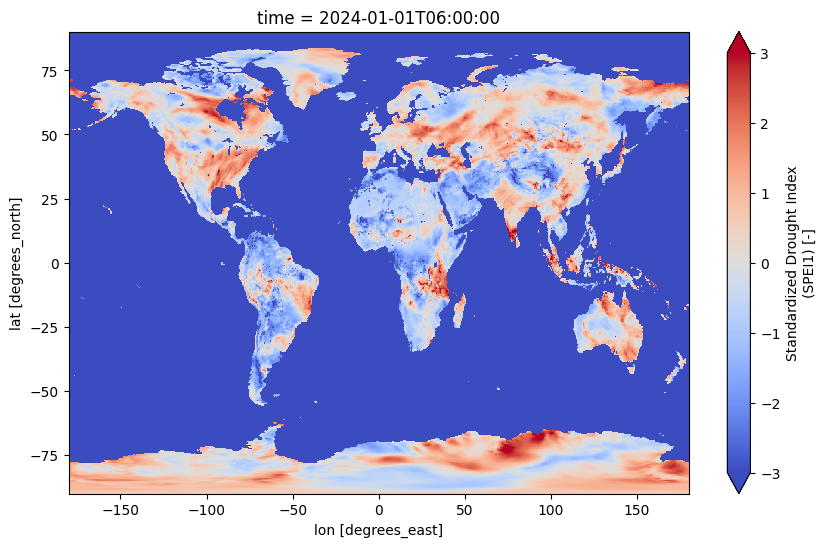

In [11]:
spei1.isel(time=0).plot(cmap='coolwarm', figsize=(10, 6), vmin=-3, vmax=3)